# Pré Processamento da Base de Dados

In [57]:
import pandas as pd
import numpy as np

base_reservations = pd.read_csv('hotel_reservations.csv')
base_reservations

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


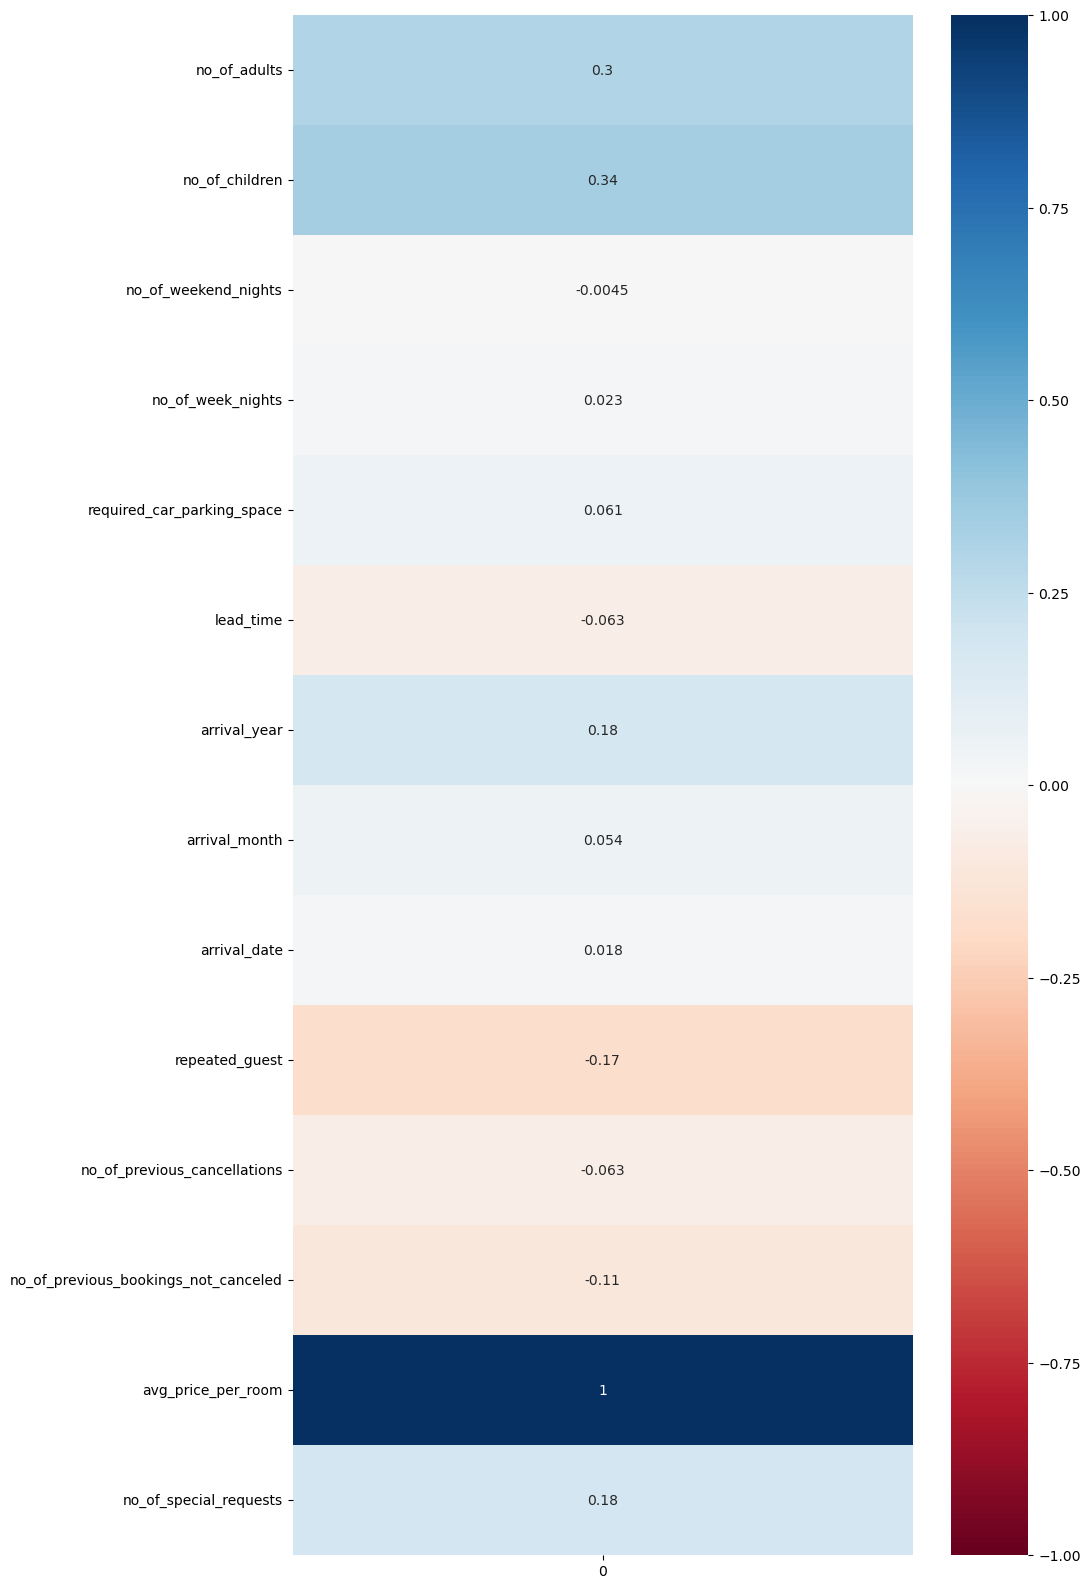

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
# Convert 'avg_price_per_room' column to numeric, coercing errors to NaN
base_reservations['avg_price_per_room'] = pd.to_numeric(base_reservations['avg_price_per_room'], errors='coerce')

# Filter the DataFrame to include only numeric columns
numeric_df = base_reservations.select_dtypes(include=[np.number])

# Check if 'avg_price_per_room' is still in the filtered DataFrame
if 'avg_price_per_room' in numeric_df.columns:
    # Calculate the correlation of numeric columns with 'avg_price_per_room'
    corr = numeric_df.corrwith(numeric_df["avg_price_per_room"]).to_frame().dropna()

    # Create a figure and axis for the heatmap
    fig, ax = plt.subplots(figsize=(10, 20))

    # Create the heatmap using seaborn
    sns.heatmap(corr, cmap="RdBu", annot=True, vmin=-1, vmax=1, ax=ax)

    plt.show()
else:
    print("Coluna avg_price_per_room não está disponível ou não foi encontrada.")


In [59]:
# armazenar no RDS

In [60]:
# remover coluna avg_price_per_room

In [61]:
# salvar novamente no RDS

In [62]:
#  Removing unnecessary or weakly correlated columns with 'avg_price_per_room'
base_reservations.drop(columns = ['Booking_ID', 'booking_status', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'no_of_weekend_nights', 'no_of_week_nights', 'arrival_month', 'lead_time'], axis=1, inplace=True)
base_reservations

,no_of_adults,no_of_children,type_of_meal_plan,required_car_parking_space,room_type_reserved,arrival_year,arrival_date,market_segment_type,avg_price_per_room,no_of_special_requests
0,2,0,Meal Plan 1,0,Room_Type 1,2017,2,Offline,65.00,0
1,2,0,Not Selected,0,Room_Type 1,2018,6,Online,106.68,1
2,1,0,Meal Plan 1,0,Room_Type 1,2018,28,Online,60.00,0
3,2,0,Meal Plan 1,0,Room_Type 1,2018,20,Online,100.00,0
4,2,0,Not Selected,0,Room_Type 1,2018,11,Online,94.50,0
...,...,...,...,...,...,...,...,...,...,...
36270,3,0,Meal Plan 1,0,Room_Type 4,2018,3,Online,167.80,1
36271,2,0,Meal Plan 1,0,Room_Type 1,2018,17,Online,90.95,2
36272,2,0,Meal Plan 1,0,Room_Type 1,2018,1,Online,98.39,2
36273,2,0,Not Selected,0,Room_Type 1,2018,21,Online,94.50,0


In [63]:
# Creating a new column 'label_avg_price_per_room' by categorizing 'avg_price_per_room' into bins
base_reservations['label_avg_price_per_room'] = pd.cut(base_reservations['avg_price_per_room'],
                                        bins=[float('-inf'), 85, 115, float('inf')],
                                        labels=[0, 1, 2])
base_reservations

,no_of_adults,no_of_children,type_of_meal_plan,required_car_parking_space,room_type_reserved,arrival_year,arrival_date,market_segment_type,avg_price_per_room,no_of_special_requests,label_avg_price_per_room
0,2,0,Meal Plan 1,0,Room_Type 1,2017,2,Offline,65.00,0,0
1,2,0,Not Selected,0,Room_Type 1,2018,6,Online,106.68,1,1
2,1,0,Meal Plan 1,0,Room_Type 1,2018,28,Online,60.00,0,0
3,2,0,Meal Plan 1,0,Room_Type 1,2018,20,Online,100.00,0,1
4,2,0,Not Selected,0,Room_Type 1,2018,11,Online,94.50,0,1
...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,Meal Plan 1,0,Room_Type 4,2018,3,Online,167.80,1,2
36271,2,0,Meal Plan 1,0,Room_Type 1,2018,17,Online,90.95,2,1
36272,2,0,Meal Plan 1,0,Room_Type 1,2018,1,Online,98.39,2,1
36273,2,0,Not Selected,0,Room_Type 1,2018,21,Online,94.50,0,1


In [64]:
# removing avg_price_per_room column
base_reservations.drop(columns = ['avg_price_per_room'], axis=1, inplace=True)
base_reservations

,no_of_adults,no_of_children,type_of_meal_plan,required_car_parking_space,room_type_reserved,arrival_year,arrival_date,market_segment_type,no_of_special_requests,label_avg_price_per_room
0,2,0,Meal Plan 1,0,Room_Type 1,2017,2,Offline,0,0
1,2,0,Not Selected,0,Room_Type 1,2018,6,Online,1,1
2,1,0,Meal Plan 1,0,Room_Type 1,2018,28,Online,0,0
3,2,0,Meal Plan 1,0,Room_Type 1,2018,20,Online,0,1
4,2,0,Not Selected,0,Room_Type 1,2018,11,Online,0,1
...,...,...,...,...,...,...,...,...,...,...
36270,3,0,Meal Plan 1,0,Room_Type 4,2018,3,Online,1,2
36271,2,0,Meal Plan 1,0,Room_Type 1,2018,17,Online,2,1
36272,2,0,Meal Plan 1,0,Room_Type 1,2018,1,Online,2,1
36273,2,0,Not Selected,0,Room_Type 1,2018,21,Online,0,1


In [65]:
# Ordering the 'label_avg_price_per_room' column to be the first column in the dataset
col_order = ['label_avg_price_per_room'] + [col for col in base_reservations.columns if col != 'label_avg_price_per_room']
base_reservations = base_reservations[col_order]

base_reservations

,label_avg_price_per_room,no_of_adults,no_of_children,type_of_meal_plan,required_car_parking_space,room_type_reserved,arrival_year,arrival_date,market_segment_type,no_of_special_requests
0,0,2,0,Meal Plan 1,0,Room_Type 1,2017,2,Offline,0
1,1,2,0,Not Selected,0,Room_Type 1,2018,6,Online,1
2,0,1,0,Meal Plan 1,0,Room_Type 1,2018,28,Online,0
3,1,2,0,Meal Plan 1,0,Room_Type 1,2018,20,Online,0
4,1,2,0,Not Selected,0,Room_Type 1,2018,11,Online,0
...,...,...,...,...,...,...,...,...,...,...
36270,2,3,0,Meal Plan 1,0,Room_Type 4,2018,3,Online,1
36271,1,2,0,Meal Plan 1,0,Room_Type 1,2018,17,Online,2
36272,1,2,0,Meal Plan 1,0,Room_Type 1,2018,1,Online,2
36273,1,2,0,Not Selected,0,Room_Type 1,2018,21,Online,0


In [66]:
columns_to_encode = ["type_of_meal_plan","room_type_reserved","market_segment_type"]
base_reservations =  pd.get_dummies(base_reservations, columns=columns_to_encode, prefix=columns_to_encode)

base_reservations = base_reservations.astype(int)

# Convert boolean columns to integers
bool_columns = ['type_of_meal_plan_Meal Plan 1', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected',
        'room_type_reserved_Room_Type 1', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4',
        'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Aviation',
        'market_segment_type_Complementary', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'market_segment_type_Online']

base_reservations[bool_columns] = base_reservations[bool_columns].astype(int)

base_reservations

,label_avg_price_per_room,no_of_adults,no_of_children,required_car_parking_space,arrival_year,arrival_date,no_of_special_requests,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,0,2,0,0,2017,2,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,2,0,0,2018,6,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,2018,28,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,2,0,0,2018,20,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,2,0,0,2018,11,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,2,3,0,0,2018,3,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1
36271,1,2,0,0,2018,17,2,1,0,0,...,0,0,0,0,0,0,0,0,0,1
36272,1,2,0,0,2018,1,2,1,0,0,...,0,0,0,0,0,0,0,0,0,1
36273,1,2,0,0,2018,21,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [67]:
# Splitting the dataset into a training set
base_treinamento = base_reservations.iloc[0:25392, :]
base_treinamento.shape

(25392, 23)

In [68]:
# Splitting the dataset into a testing set
base_teste = base_reservations.iloc[25392:, :]
base_teste.shape

(10883, 23)

In [69]:
# Turn into CSV
base_treinamento.to_csv('hotel_reservations_train_xgboost.csv', header = True, index = False)
base_teste.to_csv('hotel_reservations_test_xgboost.csv', header = False, index = False)